# Feedback Prediction for Blog Posts

### John Roof, Sanjay Tamizharasu, and Aleisha Nelson - Group 6

### Step 1: Import Libraries

In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn import preprocessing
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import sklearn.datasets as ds
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import math
import warnings
warnings.filterwarnings("ignore")

### Step 2: Load and Inspect Data

In [156]:
#Load the Data from the CSVs
trainDataOriginal = pd.read_table("data/blogData_train.csv", sep=",")
testDataOriginal = pd.read_table("data/blogData_test-2012.02.01.00_00.csv", sep=",")
trainData = trainDataOriginal #Save original imports
testData = testDataOriginal #Save original imports
print("Train Data Head")
print(trainData.head())
print("Test Data Head")
print(testData.head())

Train Data Head
          1          2  3    4     5         6         7  8    9   10 ...   \
0  40.30467  53.845657  0  401  15.0  15.52416  32.44188  0  377  3.0 ...    
1  40.30467  53.845657  0  401  15.0  15.52416  32.44188  0  377  3.0 ...    
2  40.30467  53.845657  0  401  15.0  15.52416  32.44188  0  377  3.0 ...    
3  40.30467  53.845657  0  401  15.0  15.52416  32.44188  0  377  3.0 ...    
4  40.30467  53.845657  0  401  15.0  15.52416  32.44188  0  377  3.0 ...    

   272  273  274  275  276  277  278  279  280  281  
0    0    1    0    0    0    0    0    0  0.0    1  
1    1    0    0    0    0    0    0    0  0.0    0  
2    1    0    0    0    0    0    0    0  0.0    0  
3    0    1    0    0    0    0    0    0  0.0    1  
4    0    1    0    0    0    0    0    0  0.0   27  

[5 rows x 281 columns]
Test Data Head
           1          2  3    4     5          6          7  8    9   10 ...   \
0  10.630660  17.882992  1  259   5.0   4.018276  10.396790  0  235  1.

Train Data Matrix


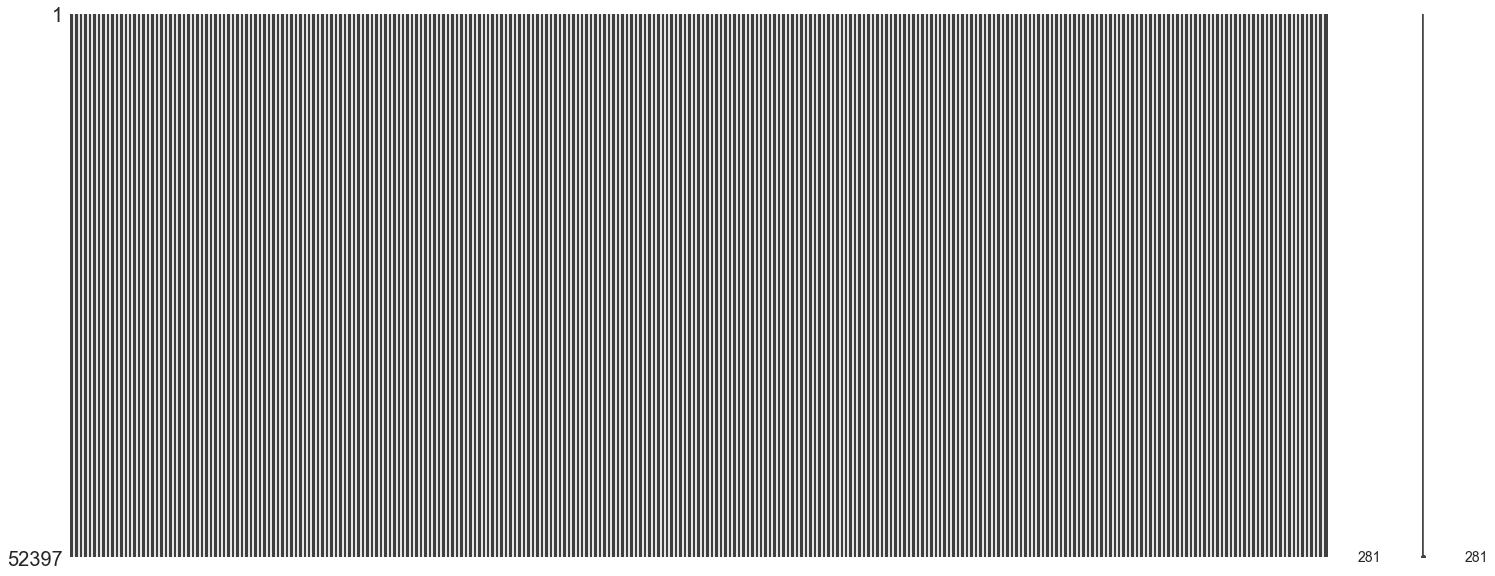

Test Data Matrix


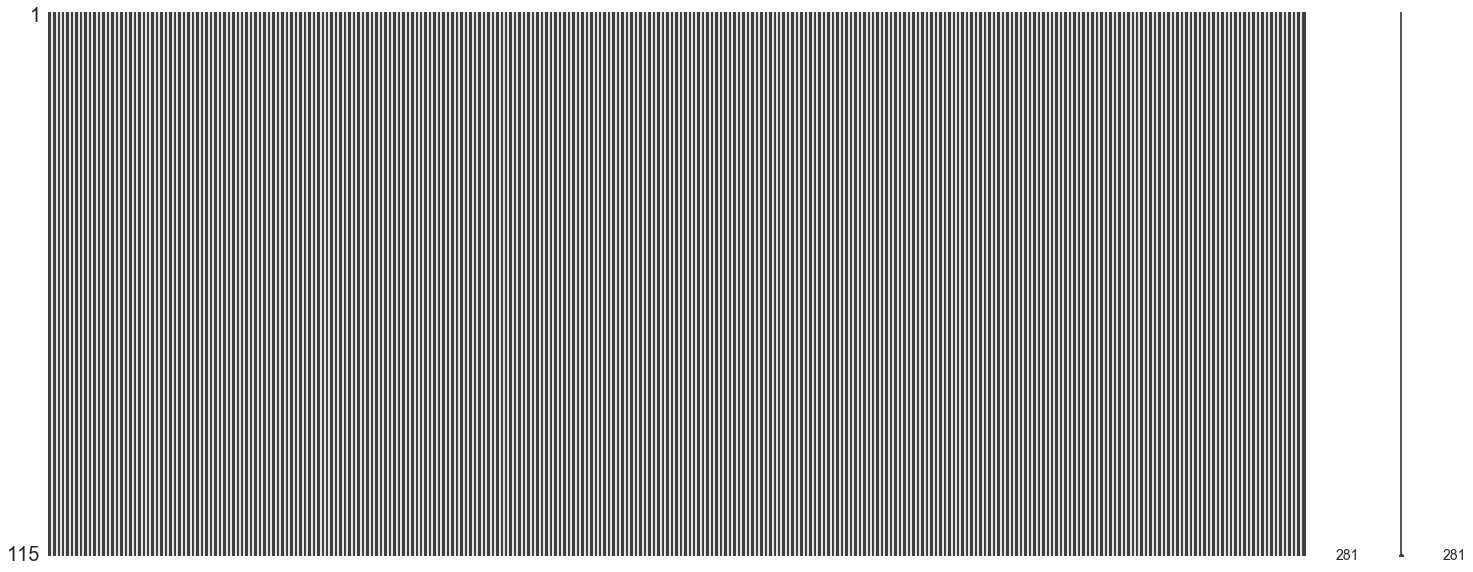

In [157]:
#Use MissingNo Matrix to View Data to Look for Hole -- Data is Full
print("Train Data Matrix")
msno.matrix(trainData) #Please locate images/MSNO_Matrix_testData.jpg to view a zoomed in version
print("Test Data Matrix")
msno.matrix(testData) #Please locate images/MSNO_Matrix_trainData.jpg to view a zoomed in version

## Step 3: Clean Data

### Correlation

In [158]:
#Create correlation matrix to find features that are correlated to our comments column
correlation = np.corrcoef(trainData, rowvar=0)
print("Correlation Matrix of Train Data -- Shape of Matix: " + str(correlation.shape))
print(correlation)
print(correlation.shape)

Correlation Matrix of Train Data -- Shape of Matix: (281, 281)
[[ 1.          0.92606291  0.15365081 ..., -0.0177978  -0.01491155
   0.48546407]
 [ 0.92606291  1.          0.06247085 ..., -0.01960249 -0.01706052
   0.42461586]
 [ 0.15365081  0.06247085  1.         ..., -0.00235885 -0.00197156
   0.05322069]
 ..., 
 [-0.0177978  -0.01960249 -0.00235885 ...,  1.          0.8890157
  -0.00236226]
 [-0.01491155 -0.01706052 -0.00197156 ...,  0.8890157   1.         -0.00135414]
 [ 0.48546407  0.42461586  0.05322069 ..., -0.00236226 -0.00135414  1.        ]]
(281, 281)


In [159]:
#Array to hold the column numbers to delete
columnsToDelete = []

#Loop through correlation matrix and looking at the correlation to the target comments columng (index 280)
i = 1
for attribute in correlation:
    if(attribute[280] > 0.30 or attribute[280] < -0.30): #NOTE: 0.3 is the cut off for KNN
        print(str(i) + ": " + str(attribute[280])) #Print out the column number and correlation
    else: #Delete if it does not make the cut off
        columnsToDelete.append(i-1) #If not in range, save the solumn number to be deleted later
    i += 1

#Delete all columns in columnsToDelete from both trainData and testData
for i in columnsToDelete:
    trainData = trainData.drop([str(i)], axis=1)
    testData = testData.drop([str(i)], axis=1)

print("New Train Data Shape")
print(trainData.shape)
print("New Test Data Shape")
print(testData.shape)

1: 0.4854640733
2: 0.424615858222
4: 0.356604232958
5: 0.491707225499
6: 0.49763127354
7: 0.433577859258
9: 0.322105946055
10: 0.506540260662
11: 0.490111451149
12: 0.439151621595
14: 0.322774901804
15: 0.489673583828
16: 0.47199879038
17: 0.384654316968
20: 0.486315567573
21: 0.503374634773
22: 0.440003098374
24: 0.320133378573
26: 0.328524674766
30: 0.338960560031
31: 0.335829153989
35: 0.461626752865
36: 0.337775268138
41: 0.329669909882
45: 0.323660734967
51: 0.314445711497
52: 0.472060801089
54: 0.314176552078
281: 1.0
New Train Data Shape
(52397, 29)
New Test Data Shape
(115, 29)


## Step 4: KNN Regression

### Create KNN Model

In [160]:
#Convert Pandas DataFrame to NumPy Array for KNN
trainData = trainData.as_matrix()
testData = testData.as_matrix()

#SciKit Learn KNN Algorithm
knn = KNeighborsRegressor(n_neighbors=5, weights='uniform')
targetComments = trainData[:, 28] #Target Comments column from Test Data
trainingFeatures = trainData[:, 0:27] #Rest of columns from test data
predictedComments = knn.fit(trainingFeatures, targetComments.ravel()).predict(testData[:, 0:27]) #Predict test data to index 0-27 from test

#Print out predicted values
print("Predicted Values")
print(predictedComments)

Predicted Values
[  8.80000000e+00   4.00000000e-01   8.00000000e-01   2.80000000e+00
   1.60000000e+00   8.64000000e+01   8.00000000e-01   4.80000000e+00
   4.00000000e-01   0.00000000e+00   0.00000000e+00   1.80000000e+00
   0.00000000e+00   1.10000000e+01   1.36000000e+01   7.60000000e+00
   1.00000000e+00   2.40000000e+00   4.94000000e+01   6.60000000e+00
   1.00000000e+00   0.00000000e+00   5.60000000e+00   1.80000000e+00
   1.00000000e+00   0.00000000e+00   0.00000000e+00   2.00000000e-01
   3.80000000e+00   2.80000000e+00   1.80000000e+00   4.00000000e-01
   2.16000000e+01   0.00000000e+00   2.20000000e+00   1.70000000e+01
   1.22000000e+01   0.00000000e+00   0.00000000e+00   0.00000000e+00
   2.54000000e+01   0.00000000e+00   3.40000000e+00   1.00000000e+00
   1.08000000e+01   6.00000000e-01   4.80000000e+00   0.00000000e+00
   6.00000000e+00   0.00000000e+00   0.00000000e+00   2.20000000e+00
   4.94000000e+01   2.60000000e+00   0.00000000e+00   0.00000000e+00
   1.20000000e+00

### Accuracy

In [161]:
#Get accuracy using r2 score from the scikit learn library
targetTestComments = testData[:, 28]
accuracy = r2_score(targetTestComments, predictedComments)
print("Accuracy:")
print(accuracy)

Accuracy:
0.813086142151


### KNN Analysis

### Graph 1 - KNN Neighbors vs. Accuracy

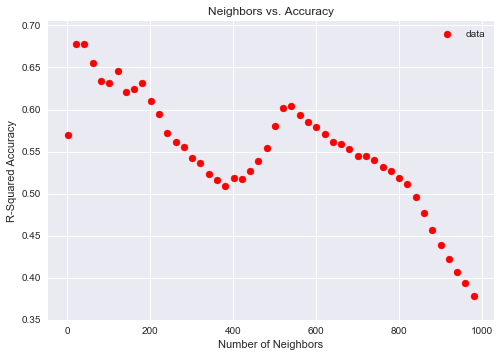

In [162]:
#Graph of the neighbors against the accuracy they produce
#We graphed this to see the trend of how the number of neighbors affected the accuracy

neighbors_ = []
accuracy_ = []
i = 1

#target comments = tc
#training features = tf
for x in range(0, 50):
    neighbors_.append(i)
    knn = KNeighborsRegressor(n_neighbors=i, weights='uniform')
    tc = trainData[:, 28] #Target Comments column from Test Data
    tf = trainData[:, 0:27] #Rest of columns from test data
    predictedValues = knn.fit(tf, tc.ravel()).predict(testData[:, 0:27])
    ttc = testData[:, 28]
    accuracy = r2_score(targetTestComments, predictedValues)
    accuracy_.append(accuracy)
    i += 20

plt.scatter(neighbors_, accuracy_, c='Red', label='data')
plt.axis('tight')
plt.xlabel('Number of Neighbors')
plt.ylabel('R-Squared Accuracy')
plt.legend(loc='upper right')
plt.title("Neighbors vs. Accuracy")
plt.show()


### Graph 2 - KNN Target Comments vs. Predicted Comments

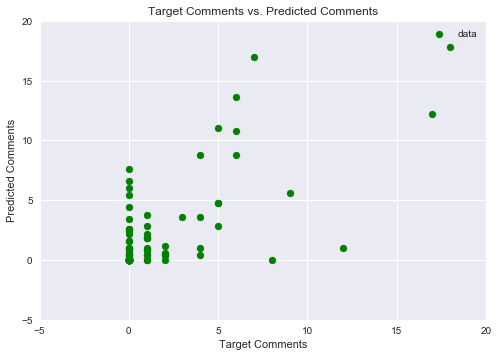

In [163]:
#Target Comments vs Predicted Comments with the 0.83 accuracy
#We graphed this to see the accuracy of our predicted comments with the 
target = testData[:, 28]

plt.scatter(target, predictedComments, c='Green', label='data')
plt.axis([-5,20,-5,20])
plt.xlabel('Target Comments')
plt.ylabel('Predicted Comments')
plt.legend(loc='upper right')
plt.title("Target Comments vs. Predicted Comments")
plt.show()

## Step 5: Linear Regression

In [164]:
#Reload Data for Linear Regression
trainData = trainDataOriginal #Use Original Import to get full data set
testData = testDataOriginal #Use Original Import to get full data set
print("Train Data Head")
print(trainData.head())
print("Test Data Head")
print(testData.head())

Train Data Head
          1          2  3    4     5         6         7  8    9   10 ...   \
0  40.30467  53.845657  0  401  15.0  15.52416  32.44188  0  377  3.0 ...    
1  40.30467  53.845657  0  401  15.0  15.52416  32.44188  0  377  3.0 ...    
2  40.30467  53.845657  0  401  15.0  15.52416  32.44188  0  377  3.0 ...    
3  40.30467  53.845657  0  401  15.0  15.52416  32.44188  0  377  3.0 ...    
4  40.30467  53.845657  0  401  15.0  15.52416  32.44188  0  377  3.0 ...    

   272  273  274  275  276  277  278  279  280  281  
0    0    1    0    0    0    0    0    0  0.0    1  
1    1    0    0    0    0    0    0    0  0.0    0  
2    1    0    0    0    0    0    0    0  0.0    0  
3    0    1    0    0    0    0    0    0  0.0    1  
4    0    1    0    0    0    0    0    0  0.0   27  

[5 rows x 281 columns]
Test Data Head
           1          2  3    4     5          6          7  8    9   10 ...   \
0  10.630660  17.882992  1  259   5.0   4.018276  10.396790  0  235  1.

### Correlation

In [165]:
#Find correlation matrix to find the most correlated columns to our 
correlation = np.corrcoef(trainData, rowvar=0)
print(correlation)
print(correlation.shape)

columnsToDelete = []

#Delete columns that do not make the cutoff
i = 1
for attribute in correlation:
    #NOTE: 0.1 is the best cutoff for Linear Regression, gives us the highest accuracy store
    if(attribute[280] > 0.1 or attribute[280] < -0.1): 
        print(str(i) + ": " + str(attribute[280]))
    else:
        columnsToDelete.append(i-1)
    i += 1

for i in columnsToDelete:
    trainData = trainData.drop(str(i), axis=1)
    testData = testData.drop([str(i)], axis=1)

print(trainData.shape)
print(testData.shape)

[[ 1.          0.92606291  0.15365081 ..., -0.0177978  -0.01491155
   0.48546407]
 [ 0.92606291  1.          0.06247085 ..., -0.01960249 -0.01706052
   0.42461586]
 [ 0.15365081  0.06247085  1.         ..., -0.00235885 -0.00197156
   0.05322069]
 ..., 
 [-0.0177978  -0.01960249 -0.00235885 ...,  1.          0.8890157
  -0.00236226]
 [-0.01491155 -0.01706052 -0.00197156 ...,  0.8890157   1.         -0.00135414]
 [ 0.48546407  0.42461586  0.05322069 ..., -0.00236226 -0.00135414  1.        ]]
(281, 281)
1: 0.4854640733
2: 0.424615858222
4: 0.356604232958
5: 0.491707225499
6: 0.49763127354
7: 0.433577859258
9: 0.322105946055
10: 0.506540260662
11: 0.490111451149
12: 0.439151621595
14: 0.322774901804
15: 0.489673583828
16: 0.47199879038
17: 0.384654316968
19: 0.299688146495
20: 0.486315567573
21: 0.503374634773
22: 0.440003098374
23: -0.280791789691
24: 0.320133378573
26: 0.328524674766
27: 0.266814939441
29: 0.247456905657
30: 0.338960560031
31: 0.335829153989
32: 0.2838844724
34: 0.251492

### Split Data

In [166]:
#Convert Pandas DataFrame to NumPy Array
trainData = trainData.as_matrix()
testData = testData.as_matrix()

#Split Data Sets into Features and Target Comments
targetComments = trainData[:, 49]
trainingFeatures = trainData[:, 0:48]
targetTestComments = testData[:, 49]
targetTestFeatures = testData[:, 0:48]

#Print out shapes to verify sizes
print(targetComments.shape)
print(trainingFeatures.shape)
print(targetTestComments.shape)
print(targetTestFeatures.shape)

(52397,)
(52397, 48)
(115,)
(115, 48)


### Create Linear Regression Model

In [167]:
# Create linear regression object
linRegr = linear_model.LinearRegression()

# Train the model using the training sets
linRegr.fit(trainingFeatures, targetComments)

# The coefficients (aka Theta values)
print('Linear Regression Model Coefficients:')
print(linRegr.coef_)

#Predicted Values
print('Predicted Values:')
predictedValues = linRegr.predict(testData[:, 0:48])
print(predictedValues)

Linear Regression Model Coefficients:
[ -3.69161227e-01   1.77134438e+08   6.43290105e-03   7.60159622e-03
  -5.10592632e+05  -1.26163383e+00  -1.30350847e-02   1.41827851e-01
   5.10594012e+05  -2.10297770e+05  -1.18746275e-02  -2.64643992e-02
  -1.44616257e-01  -1.77134438e+08   4.56278354e-03   6.32496152e-02
   5.10594609e+05   6.86818391e-02  -1.19923548e-02   1.44068798e-01
  -5.63426523e+00  -1.66964873e+05  -7.46459167e-03  -3.83770357e-01
  -2.24989307e+07  -5.60666818e+03  -1.19276506e-01  -1.10618446e+00
   2.24989463e+07   4.04968192e+03  -1.12789129e-02   1.14352069e-01
   1.66965098e+05   3.09841844e-02  -6.81337231e-03   2.24989333e+07
  -2.04040158e-01  -9.08070132e-02   6.48291443e-01  -4.75314731e-02
  -1.52456799e+10   1.52456799e+10  -3.03299726e-02   1.52456799e+10
  -2.31598429e+00   1.74211862e+00   1.86389194e+00   1.13099492e+00]
Predicted Values:
[  6.52955090e+00   4.95149075e+00   2.24056267e+00   5.56528698e+00
   3.36169512e+00   5.77489418e+01  -9.1939691

### Accuracy

In [168]:
#Here we are computing our R squared accuracy using your predicted values from the linear regression model

print("Accuracy:")
print(r2_score(targetTestComments, predictedValues, sample_weight=None, multioutput=None))

Accuracy:
0.70644855941


### Linear Regressions Analysis

### Graph 3 - Linear Regression Feature 53 vs. Predicted Comments

Parameters thetas: -2.1, 0.26


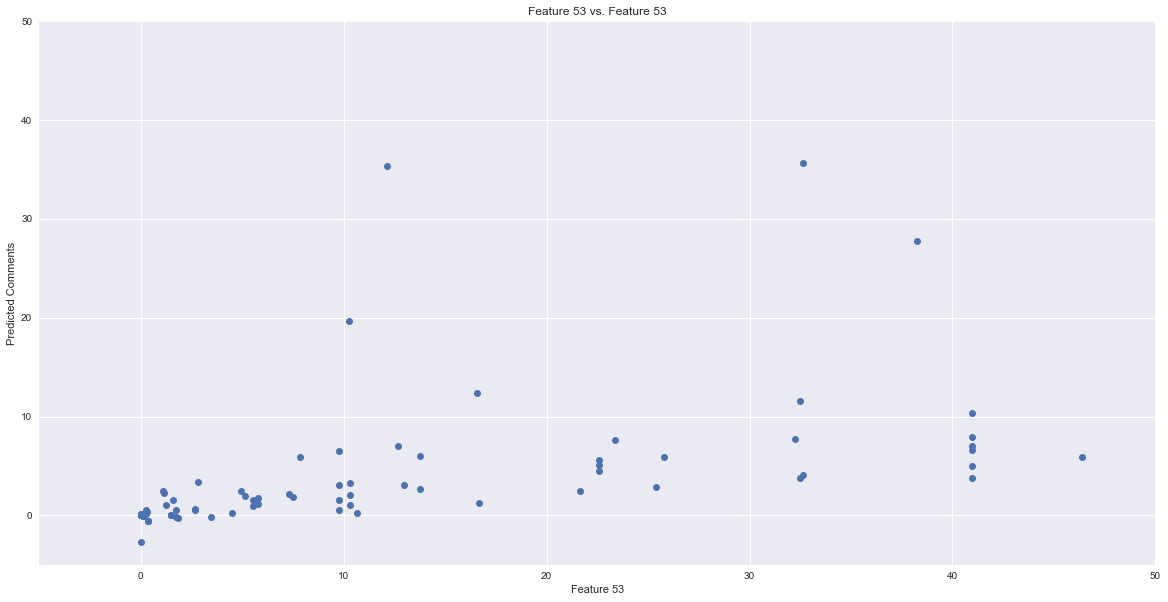

In [176]:
#Feature 53: Number of comments recieved during the 48 - 24 hour period before basetime
#Here we are picking one feature from our test set to plot against our predicted data that shows a good linear correlation

xTrain = testData[:, 12:13]
yTrain = predictedValues

#Create Linear Regression Model - based off the Sci-Kit learn linear regression library
model = LinearRegression()
model.fit(xTrain,yTrain)
intercept = model.intercept_
slope = model.coef_[0]
#creating best fit line based on the calculated slope and Y-intercept
best_fit = (xTrain * slope) + intercept
print "Parameters thetas: " + str(round(model.intercept_,2)) +\
      ", " + ", ".join([str(round(x,2)) for x in model.coef_])
    
fig = plt.figure(figsize=(20,10))
ax = plt.axes(xlim=(-5, 50), ylim =(-5, 50))
ax.plot(xTrain,yTrain,'o')
plt.xlabel('Feature 53')
plt.ylabel('Predicted Comments')
plt.title('Feature 53 vs. Feature 53')
plt.show()

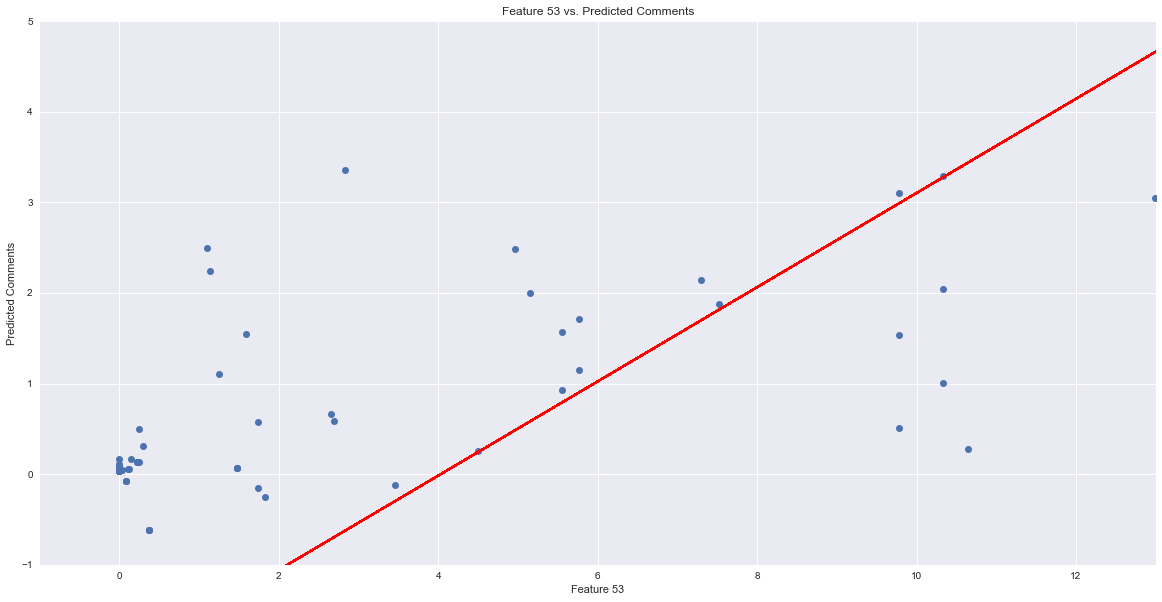

In [180]:
model = LinearRegression() # create an object of the LinearRegression class
model.fit(xTrain,yTrain) # train the model on the training examples
intercept = model.intercept_
slope = model.coef_[0]*2

#Generating best fit line based on computed slope and y-intercept
best_fit = (xTrain * slope) + intercept 

#Setting bounds of the graph we want to show
fig = plt.figure(figsize=(20,10))
ax = plt.axes(xlim=(-1, 25), ylim=(-5, 20))
ax.plot(xTrain,yTrain,'o')
line, = ax.plot([], [], lw=1.5)
plt.plot(xTrain, best_fit, 'k-', color = "r")

#Plotting
plt.xlabel('Feature 53')
plt.ylabel('Predicted Comments')
plt.title('Feature 53 vs. Predicted Comments')
plt.axis([-1,13,-1,5])
plt.show()

### Graph 4 - Linear Regression Feature 56 vs. Predicted Comments

Parameters thetas: 4.19, 0.1


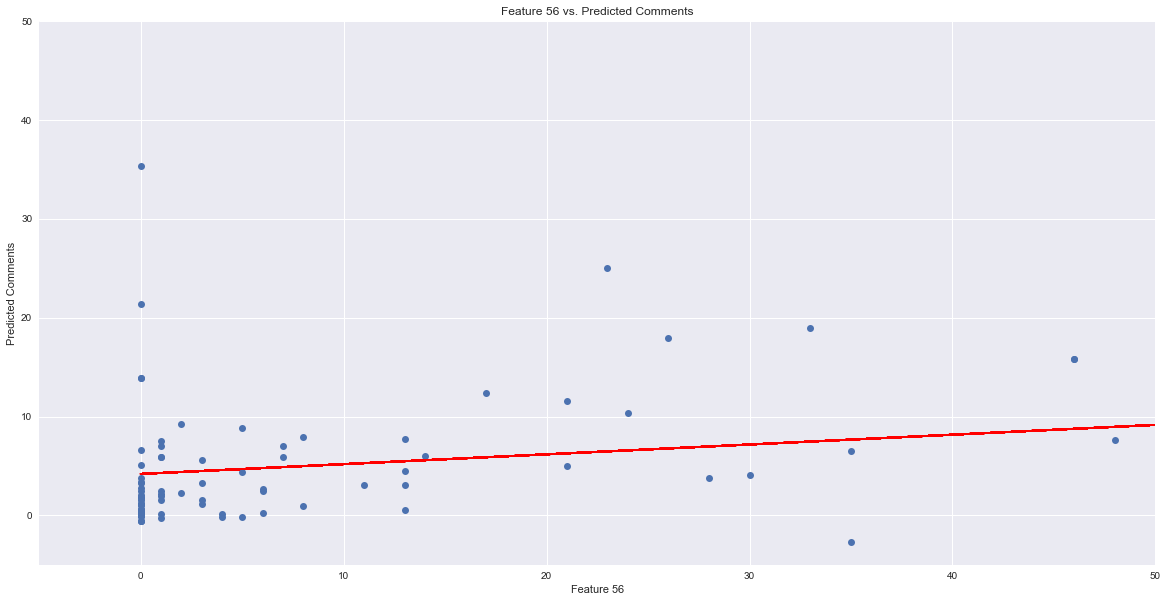

In [171]:
#Feature 56: TrackBacks -- the amount of time our blog has been linked to in other blogs
#We get a nice regression from comparing this feature and our predicted comments

xTrain = testData[:, 42:43]
yTrain = predictedValues

#Create Regression
model = LinearRegression()
model.fit(xTrain,yTrain)
intercept = model.intercept_
slope = model.coef_[0]

#Generating best fit line based on computed slope and y-intercept
best_fit = (xTrain * slope) + intercept
print "Parameters thetas: " + str(round(model.intercept_,2)) +\
      ", " + ", ".join([str(round(x,2)) for x in model.coef_])

#Plot Regression
fig = plt.figure(figsize=(20,10))
ax = plt.axes(xlim=(-5, 50), ylim=(-5, 50))
ax.plot(xTrain,yTrain,'o')
line, = ax.plot([], [], lw=1.5)
plt.plot(xTrain, best_fit, 'k-', color = "r")
plt.xlabel('Feature 56')
plt.ylabel('Predicted Comments')
plt.title('Feature 56 vs. Predicted Comments')
plt.show()

### Graph 5 - Feature 61

Parameters thetas: 7.02, 0.0


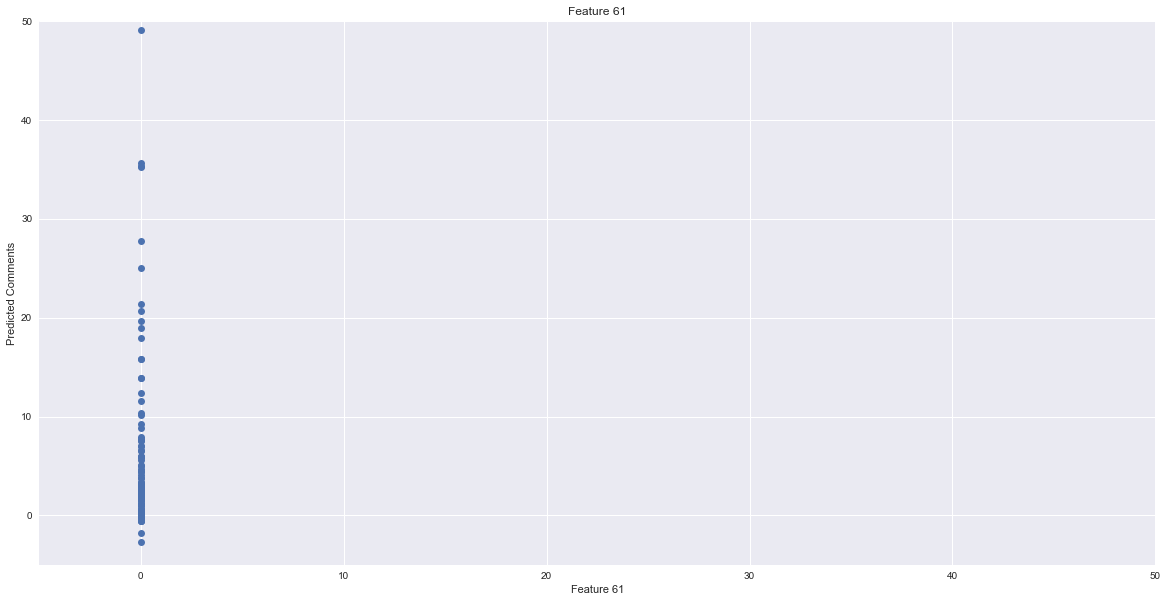

In [172]:
###Feature 61: Length of time between publication and basetime
## We included this to show that some of our features don't necessarily carry linear patterns 
## when plotted versus our predicted comments

xTrain = testData[:, 48:49]
yTrain = predictedValues

#Create Linear Regression Model
model = LinearRegression()
model.fit(xTrain,yTrain)
intercept = model.intercept_
slope = model.coef_[0]
best_fit = (xTrain * slope*2) + intercept
print "Parameters thetas: " + str(round(model.intercept_,2)) +\
      ", " + ", ".join([str(round(x,2)) for x in model.coef_])
    
fig = plt.figure(figsize=(20,10))
ax = plt.axes(xlim=(-5, 50), ylim =(-5, 50))
ax.plot(xTrain,yTrain,'o')
plt.xlabel('Feature 61')
plt.ylabel('Predicted Comments')
plt.title('Feature 61')
plt.show()